#1. A Single Neuron
## What is Deep learning?

* 복잡한 연산을 하기 위한 머신 러닝 방법 중 하나

* 딥러닝의 깊이 있는 연산이 현실의 복잡한 데이터 분석을 가능하게 했음
*   뉴런간의 강력한 연결을 기반으로 딥러닝은 뛰어난 성능을 가짐.

## The Linear unit

*   뉴런의 구성 요소

*   input - x
*   weight - w
*   bias - b
*   output - y

*   input data 가 신경망을 지나갈 때 가중치 w를 곱하여 다음 노드에 전달
*   bias는 뉴런이 input data와 독립적으로 결과를 도출할 수 있도록 함.

## Multiple inputs

*   input data x 가 여러 개인 경우 노드를 추가하여 가중치 연산 진행
*   항목 추가

## Linear Units in Keras










### Keras


*   keras.Sequential -> neural network를 layer stack을 기반으로 생성함. dense layer 생성함.
*   units -> output개수 지정
*   input_shape -> input의 dimension을 알려줌





In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 2. Deep Neural Networks

*   Key idea: Modularity -> 간단한 함수를 이용해 복잡한 네트워크 구성

## Layers

*   Dense Layer: 선형 유닛들이 모여 하나의 층을 형성하는데, 이 층은 모든 입력이 각각의 유닛과 완전히 연결되어 있음. 입력의 각 요소가 층 내 모든 유닛에 연결되는 완전 연결층임. 여러 개의 선형 변환을 수행하는 유닛들이 같은 입력을 받아 개별적으로 연산을 수행하고, 이들이 모여 Dense Layer을 형성

## Activation Function

*   그러나 dense layer는 직선과 평면, 선형공간과 선형관계에만 머무른다는 한계가 있음.
*   비선형성을 다루는 (nonlinear) activation function(활성화 함수)가 필요함.

* Rectifier function (ReLu): 음수 부분이 0으로 rectify되어 있음. 선형성

## Building Sequential Models


*   activation -> 활성화 함수
*   항목 추가











In [ ]:
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])

# 3. Stochastic Gradient Descent

*   초기의 신경망에는 가중치가 랜덤으로 설정되어 있음. 신경망은 아직 아무것도 모르는 상태
*   신경망이 어떻게 학습하는지 살펴보자.
*   Training data -> feature와 target으로 이루어져있음.
*   Training data 와 loss function, optimizer가 있어야 함.

## The Loss Function
*   **무엇을**  해결해야하는지 알려주는 단계
*   data의 실제값과 예측값 간의 차이를 측정한다.
*   MAE(Mean Absoulte Error): 실제값과 예측값간 차이를 절댓값으로 나타냄.
*   신경망에게 목표(나아가야할 방향)를 제시함.

## The Optimizer - Stochastic Gradient Descent

*   **어떻게** 문제를 해결해야하는지 알려주는 단계 -> 손실값을 최소화하기 위해 가중치를 조정하는 알고리즘이다.
*   stochastic gradient descent의 과정:
  1. training data를 통해 모델을 훈련시키고 모델이 test data를 예측하도록 만듦.
  2. 실제값과 예측값 간의 차이, 즉 손실을 측정
  3. 손실을 최소화하는 방향으로 가중치를 조정
  4. 1부터 3까지의 과정을 반복

  - 이때에 매 iteration에 쓰이는 training data를 **minibatch(batch)**라고 하며, 전체의 training data를 epoch라고 한다.
  -epoch수는 모델이 하나의 individual data를 만나는 횟수와도 같다.

### Learning Rate and Batch Size

*   Learning rate 와 batch size는 SGC를 결정짓는 가장 중요한 두 parameter임.

*   매 batch마다 조정되는 정도는 learning rate에 의해 결정됨. learning rate가 작은 경우는 네트워크가 가중치 최적화를 위해 더 많은 배치로 훈련해야함을 의미함.

*   ADAM은 parameter 튜닝 없이도 learning rate를 조절하는 optimizer임.


### Adding the Loss and the optimizer















In [ ]:
#compile method 를 사용해서 loss function optimizer 생성
model.compile(
    optimizer="adam",
    loss="mae",
)

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [ ]:
# 11개의 input feature
print(X_train.shape)

(1119, 11)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)
#loss가 감소하는 것을 확인할 수 있음

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.3429 - val_loss: 0.1361
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1421 - val_loss: 0.1250
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1286 - val_loss: 0.1178
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1249 - val_loss: 0.1104
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1139 - val_loss: 0.1086
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1075 - val_loss: 0.1044
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1095 - val_loss: 0.1073
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1060 - val_loss: 0.1016
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1001 - val_loss: 0.1003
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1006 - val_loss: 0.0994


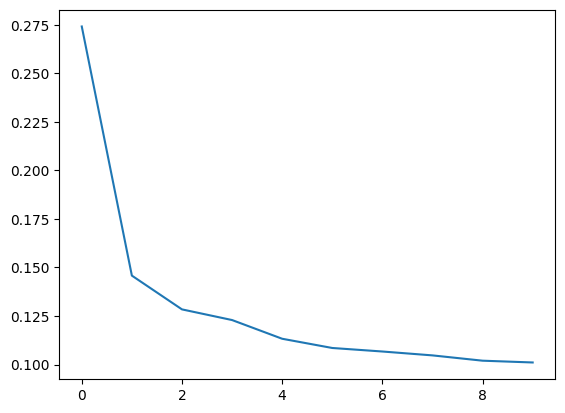

In [ ]:
# loss를 plot으로 보기
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

#4. Overfitting and underfitting

*   learning curve를 model 수정에 어떻게 이용할 것인지에 대한 단서 제공

## Interpreting the Learning Curves

*   signal 과 noise
  - signal : model의 prediction을 돕는 data
  - noise: 패턴을 가지고 있지 않은 랜덤 데이터
*   모델의 평가를 위해서는 새로운 데이터셋, 즉 validation set이 필요함.

*  learning curve는 validation set에 대한, epoch에 따른 loss 정도를 plot으로 표현한 것이다.
*   모델이 signal을 학습할 때 validation set은 감소하기만 한다.

*   validation curve와 training curve 사이의 gap은 model이 noise를 얼마나 학습했는지 알려준다.
*   모든 signal을 학습하고 noise를 하나도 학습하지 않는 모델은 이상적이나 비현실적이다. 우리는 trade-off를 하게 되는데 더 많은 siganl을 학습할 수록 더 많은 noise를 학습하게 되고 더 적은 noise를 학습하면 더 적은 signal을 학습하게 된다.


*   **Underfitting**: 모델이 충분한 signal을 학습하지 않은 상태
*   **Overfitting**: 모델이 너무 많은 signal을 학습하여 과도한 noise까지 학습한 상태

## Early Stopping

*   validation loss가 감소하지 않는 지점에서 학습을 멈추는 것 (validation loss가 최소인 지점에서 중단) -> 모델이 학습을 충분히 하는 지점임과 동시에 과도한 noise를 학습하지 않는 지점임


## Adding Early Stopping

*   callback: 매 epoch마다 작동하여 학습을 적절한 때에 중단함.














In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [ ]:
# Red wine example
from tensorflow import keras
from tensorflow.keras import layers, callbacks

#increasing Capacity
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss: 0.09270624816417694


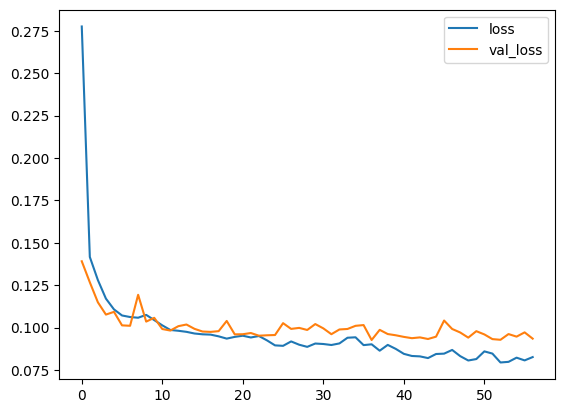

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

#5. Dropout and Batch normalization

##Dropout

*   overfitting 개선에 도움
*   layer의 구조 중 일부를 랜덤하게 drop시킴.
*   특정 패턴을 학습하기에 어려워짐 -> overfitting 방지

## Adding Dropout

*   rate -> droup할 input unit의 비율을 정함.
*   항목 추가






In [ ]:
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])

## Batch normalization

*   느리거나 불안정한 학습 개선에 도움
*   SGD는 가중치를 조정하는데 이때에 가중치는 데이터가 얼마나 activation을 많이 생성하는지의 비율에 따라 조정된다. 크기의 편차가 매우 큰 데이터를 포함하고 있는 feature에서는 학습과정이 매우 불안정할 수 있다.
*   네트워크 안에서 normalize하는 것이 개선에 도움을 줄 수 있다.
*   batch normalization layer는 들어오는 batch 순서대로 layer의 평균과 분산을 이용해 normalize 한다.
* batchnorm은 input data 를 rescaling하는 역할을 한다.batchnorm이 포함된 모델은 더 적은 epoch수로 학습하는 경향이 있다.

## Adding Batch Normalization



In [14]:
# between a layer and its activation function
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),

(<Activation name=activation, built=False>,)

## Red Wine example
* Increase the capacity, add dropout to control overfitting and batch normalization
* See how batch normalization can stabalize the training

In [15]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


red_wine = pd.read_csv('/content/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

<ipython-input-15-d2e707160e68>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [16]:
#We may need to increase the number of units in DENSE LAYERS
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


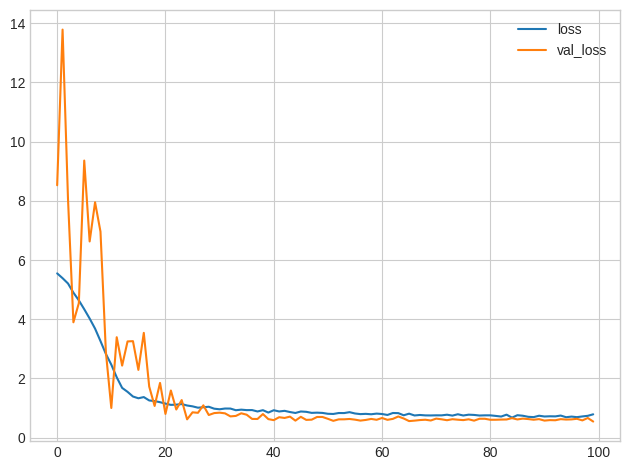

In [17]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

#오류가 감소했음을 확인할 수 있

#6. Binary Classification

* Binary classification - 이진분류, class label을 detect하는 과정

## Accuracy and Cross-Entropy
* Accuracy = 맞힌 개수 / 전체 개수
* accuracy의 문제점: loss function으로 사용할 수 없다. accuracy의 문제점을 보완하여 대체할 metric이 필요함 -> cross-entropy
*Cross-Entropy는 하나의 확률분포와 다른 하나의 확률분포 간의 거리를 측정함.-> **classification loss**로 사용할 수 있다!

## Making Probabilities with the Sigmoid function

* Cross-Entropy와 accuracy 모두 입력값으로 확률이 필요함. **Sigmoid Activation**이 데이터를 확률로 변환하는 역할을 함. 실수값을 0과 1 사이의 값으로 변환함.


In [18]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('/content/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [19]:
# Sigmoid activation 추가
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# binary classification을 위해서는 binary 버전을 이용해야함
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [21]:
#early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,
)

Best Validation Loss: 0.3551
Best Validation Accuracy: 0.8857


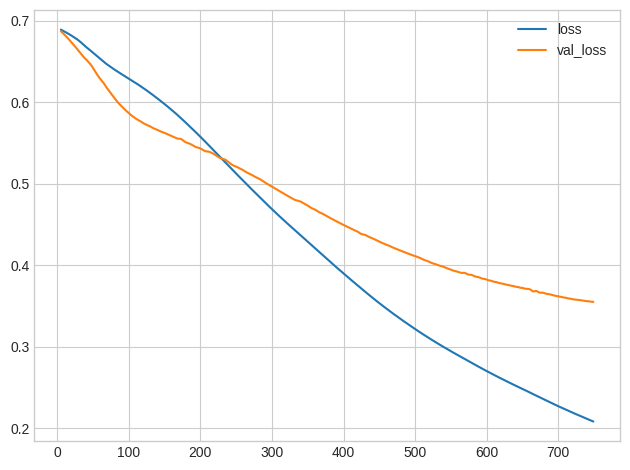

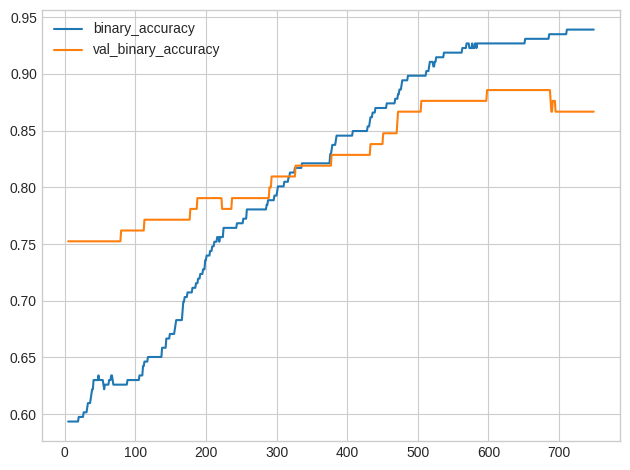

In [22]:
#Learning Curve 보기
history_df = pd.DataFrame(history.history)

history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))